In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno #
import numpy as np
import statsmodels.api as sm
import plotly.express as px

from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima





In [3]:
df = pd.DataFrame(pd.read_csv('/Users/arnenyeck/Desktop/MSU/CIS 518- Foundation of data science/Covid-group-project/ARIMA MODEL FOR ALL CONTINENT/sample1.csv'))
df

,iso_code,location,date,people_vaccinated_per_hundred
0,OWID_AFR,Africa,2/13/20,NaN
1,OWID_AFR,Africa,2/14/20,NaN
2,OWID_AFR,Africa,2/15/20,NaN
3,OWID_AFR,Africa,2/16/20,NaN
4,OWID_AFR,Africa,2/17/20,NaN
...,...,...,...,...
4888,OWID_SAM,South America,4/21/22,83.91
4889,OWID_SAM,South America,4/22/22,83.92
4890,OWID_SAM,South America,4/23/22,83.93
4891,OWID_SAM,South America,4/24/22,83.93


In [4]:
df.fillna(value = 0,
          inplace = True)

<AxesSubplot:>

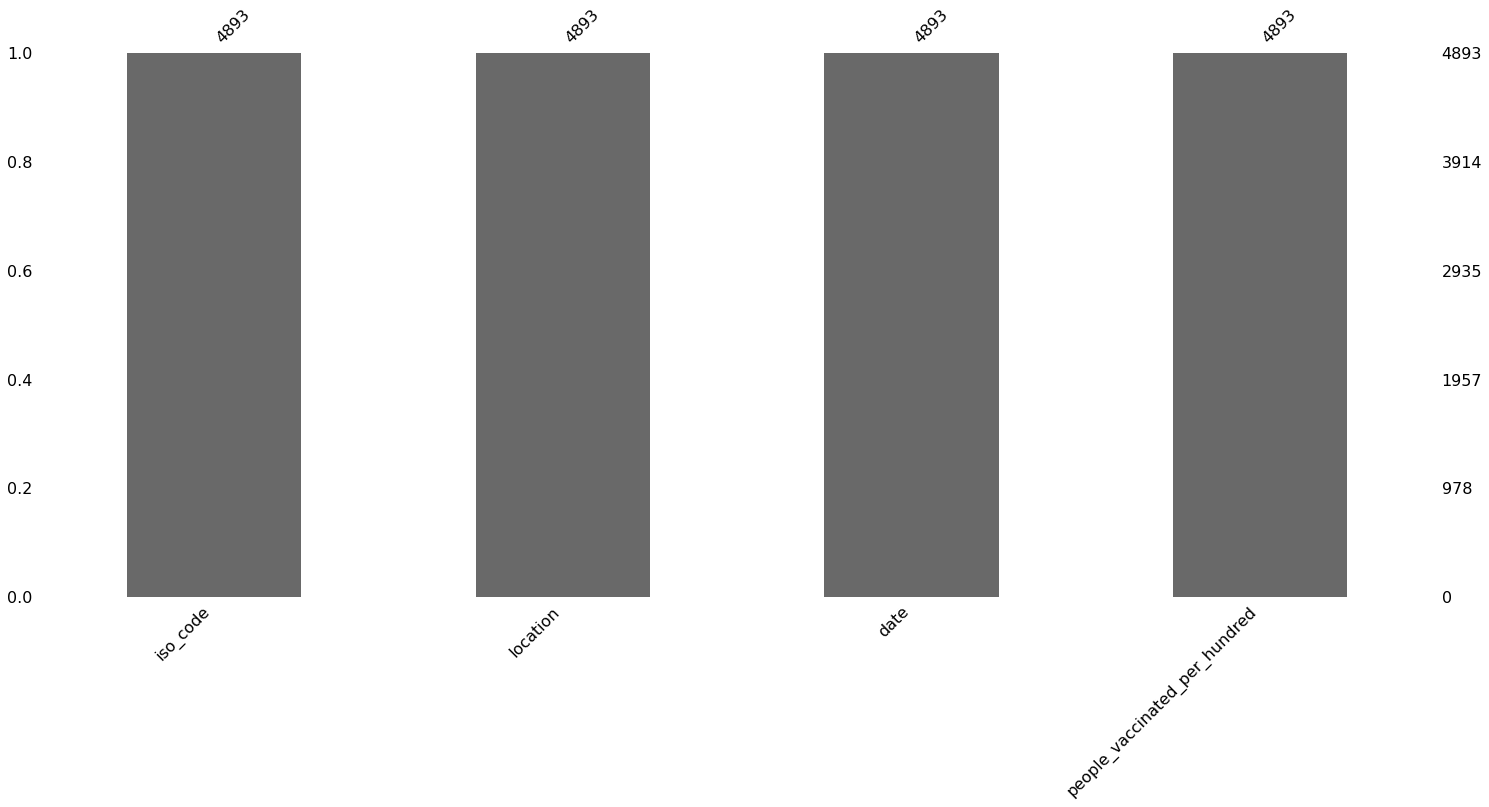

In [5]:
msno.bar(df)

In [6]:
#Sort dataset by location and search for specific IS0_CODE
df = df.sort_values('location')
ndf=df.loc[df['iso_code'] == 'OWID_AFR']

#check dataframe with specific ISO_CODE  
sndf = ndf.sort_values('people_vaccinated_per_hundred')
sndf

,iso_code,location,date,people_vaccinated_per_hundred
0,OWID_AFR,Africa,2/13/20,0.00
42,OWID_AFR,Africa,3/26/20,0.00
43,OWID_AFR,Africa,3/27/20,0.00
44,OWID_AFR,Africa,3/28/20,0.00
45,OWID_AFR,Africa,3/29/20,0.00
...,...,...,...,...
802,OWID_AFR,Africa,4/25/22,21.25
798,OWID_AFR,Africa,4/21/22,21.25
799,OWID_AFR,Africa,4/22/22,21.25
801,OWID_AFR,Africa,4/24/22,21.25


In [10]:
val = sndf['people_vaccinated_per_hundred'].values


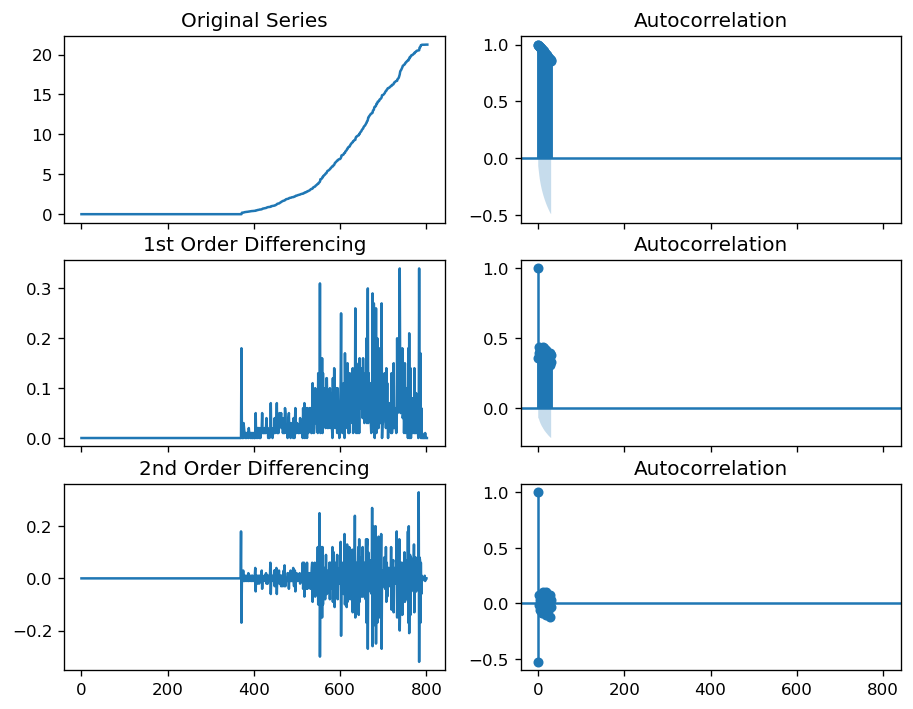

In [11]:
#Plot auto correlation and differencing
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1]) 

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plt.show()

In [12]:
model = auto_arima(val, start_p=1, start_q=1,
test='adf', # use Augmented Dickey–Fuller (ADF) test to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2905.686, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2546.640, Time=0.52 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2655.165, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2615.537, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2345.389, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2903.496, Time=1.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2909.287, Time=1.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2655.047, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2886.712, Time=1.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2907.690, Time=1.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2705.462, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2904.646, Time=1.53 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2910.524, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2544.995, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0

C:\Users\Sonika\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3108: RuntimeWarning: divide by zero encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)


C:\Users\Sonika\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


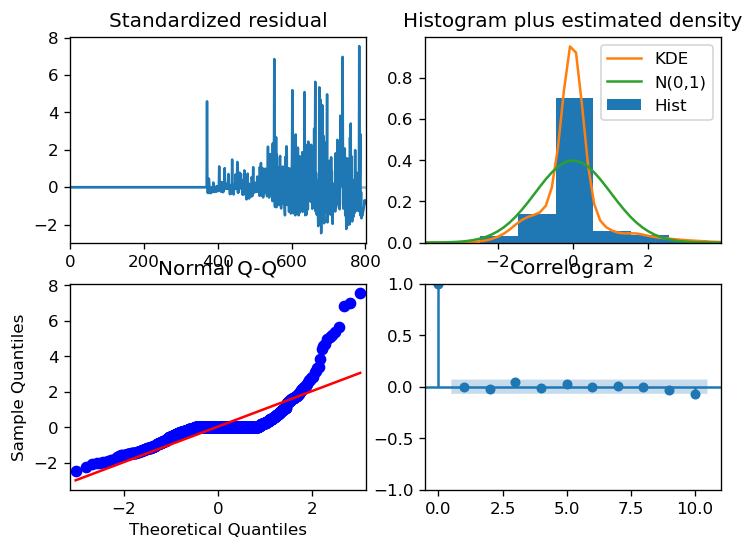

In [13]:
##perform diagnostic check for the residual 
model.plot_diagnostics(figsize=(7,5))
plt.show()

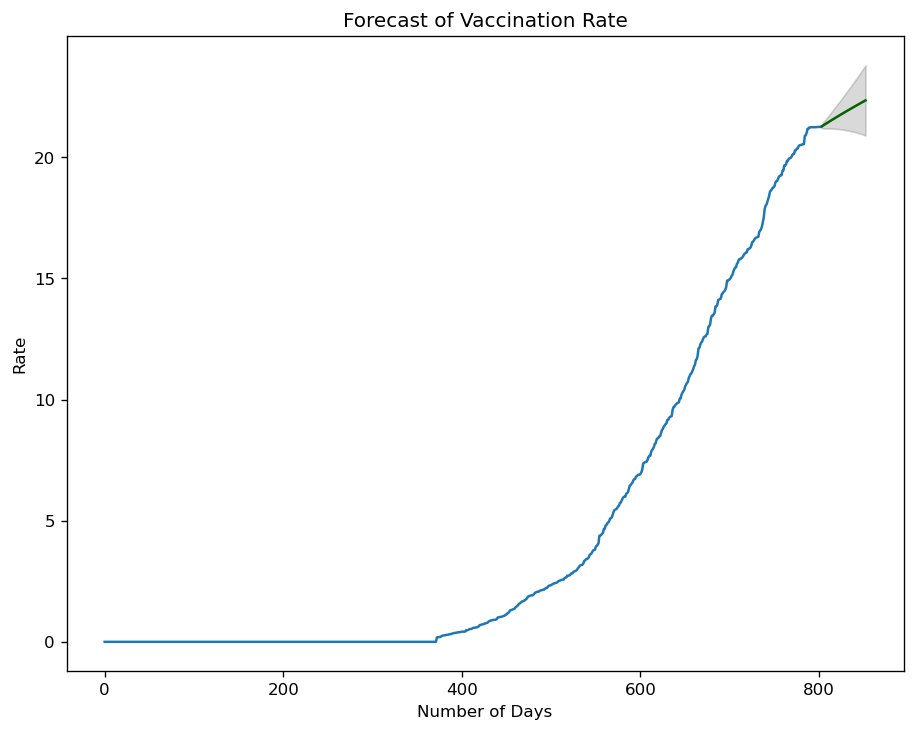

In [14]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(val), len(val)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(val)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.xlabel("Number of Days")
plt.ylabel("Rate")
plt.show()